In [1]:
# import sys
# import os
# sys.path.append(os.path.abspath('..'))

# # Kiểm tra thử
# print(sys.path)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from prediction_models.train_models.DurationTrain import train_duration_prediction_model
from prediction_models.train_models.ImportanceTrain import train_importance_prediction_model
from prediction_models.train_models.StartTimeTrain2 import train_start_time_prediction_model_2
from utils.DataPreparation import used_data
from data_preprocessing import preprocess_data

from prediction_models.train_models.TypeTrain import train_type_prediction_model

In [3]:
used_data

,StartTime,TaskID,DayOfWeek,EndTime,TaskName,Importance,Type,UserID,Duration
0,6:45,1542,Sunday,7:30,Exercise,Less Important,Personal,user1,45
1,13:00,02oKz4hI5fgvVaY7nZ7s,Monday,13:15,coding session,Normal,Education,AcggWN6cpMNmEhlgSKPVUc1Ylq32,15
2,9:30,1054,Saturday,10:00,Drive to work,Normal,Work,user1,30
3,13:30,812,Wednesday,13:50,Take a shower,Normal,Personal,user1,20
4,7:00,857,Friday,7:10,Pack bag,Normal,Personal,user1,10
...,...,...,...,...,...,...,...,...,...
1863,9:15,1238,Wednesday,10:15,Clean the house,Normal,Personal,user1,60
1864,13:30,1660,Monday,13:50,Call a friend,Normal,Personal,user1,20
1865,8:00,427,Friday,10:00,Attend a yoga retreat,Important,Personal,user1,120
1866,18:30,242,Saturday,21:30,Attend a party,Less Important,Social,user1,180


📊 Thống kê mô tả:
count    1868.000000
mean       50.383298
std        35.508364
min         0.000000
25%        20.000000
50%        45.000000
75%        63.000000
max       240.000000
Name: Duration, dtype: float64


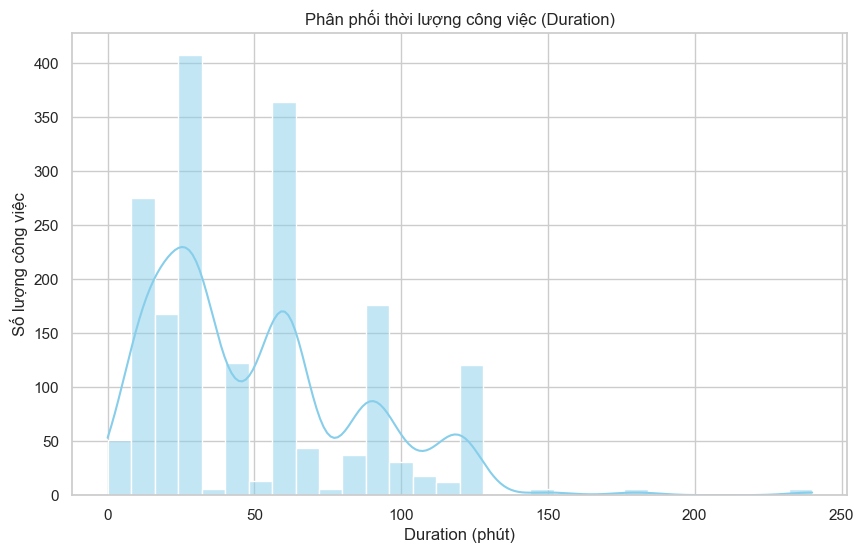

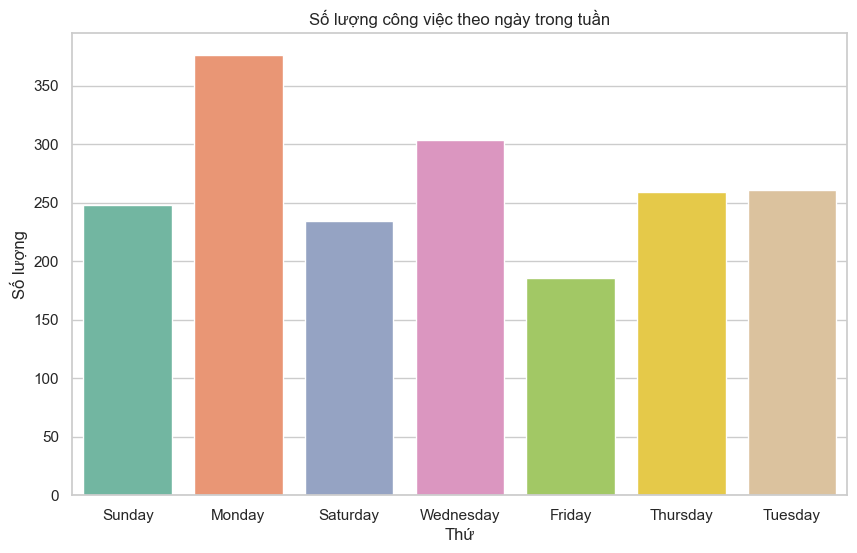

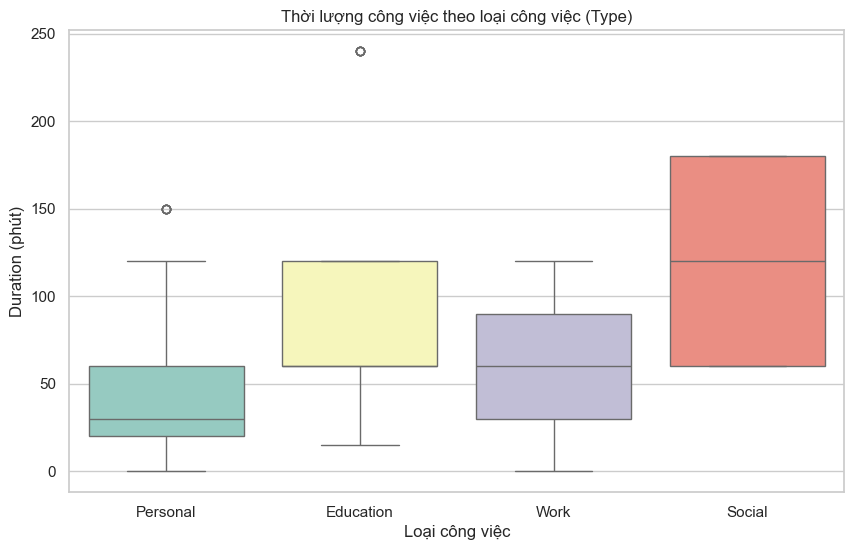

In [4]:
# Cấu hình đồ họa
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Thống kê mô tả các cột số
print("📊 Thống kê mô tả:")
print(used_data["Duration"].describe())

# 2. Biểu đồ phân phối Duration
plt.figure()
sns.histplot(used_data["Duration"], bins=30, kde=True, color="skyblue")
plt.title("Phân phối thời lượng công việc (Duration)")
plt.xlabel("Duration (phút)")
plt.ylabel("Số lượng công việc")
plt.show()

# 3. Số lượng công việc theo ngày trong tuần
plt.figure()
sns.countplot(data=used_data, x="DayOfWeek", hue="DayOfWeek", palette="Set2", legend=False)
plt.title("Số lượng công việc theo ngày trong tuần")
plt.xlabel("Thứ")
plt.ylabel("Số lượng")
plt.show()

# 4. Duration trung bình theo Type
plt.figure()
sns.boxplot(data=used_data, x="Type", hue="Type", y="Duration", palette="Set3", legend=False)
plt.title("Thời lượng công việc theo loại công việc (Type)")
plt.xlabel("Loại công việc")
plt.ylabel("Duration (phút)")
plt.show()

In [5]:
# Áp dụng quá trình tiền xử lý cho dữ liệu
used_data, task_name_vectorized = preprocess_data(used_data)

used_data

Bắt đầu tiền xử lý dữ liệu...
Kiểm tra dữ liệu thiếu ban đầu:
StartTime     0
TaskID        0
DayOfWeek     0
EndTime       0
TaskName      0
Importance    0
Type          0
UserID        0
Duration      0
dtype: int64
✅ Tiền xử lý hoàn tất.


,StartTime,TaskID,DayOfWeek,EndTime,TaskName,Importance,Type,UserID,Duration,StartTimeMinutes
0,06:45,1542,3,07:30,exercise,1,1,1,45,405
1,13:00,02oKz4hI5fgvVaY7nZ7s,1,13:15,coding session,2,0,0,15,780
2,09:30,1054,2,10:00,drive work,2,3,1,30,570
3,13:30,812,6,13:50,take shower,2,1,1,20,810
4,07:00,857,0,07:10,pack bag,2,1,1,10,420
...,...,...,...,...,...,...,...,...,...,...
1855,09:15,1238,6,10:15,clean house,2,1,1,60,555
1856,13:30,1660,1,13:50,call friend,2,1,1,20,810
1857,08:00,427,0,10:00,attend yoga retreat,0,1,1,120,480
1858,18:30,242,2,21:30,attend party,1,2,1,180,1110


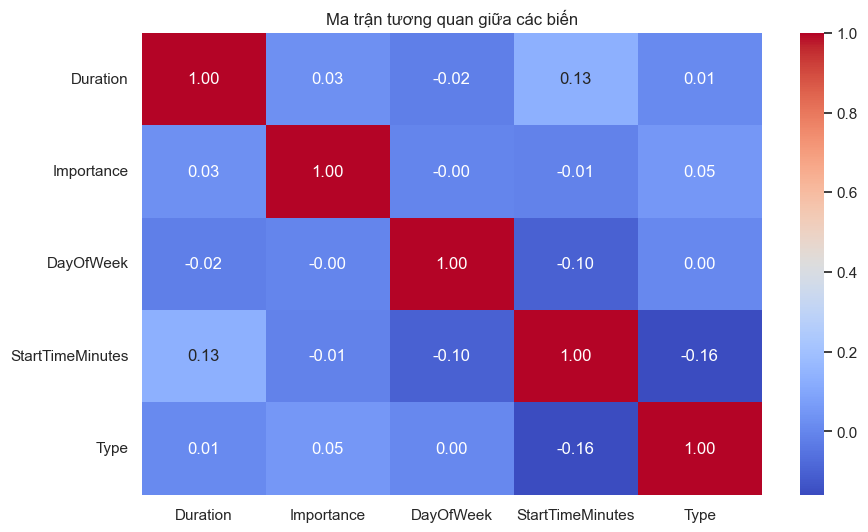

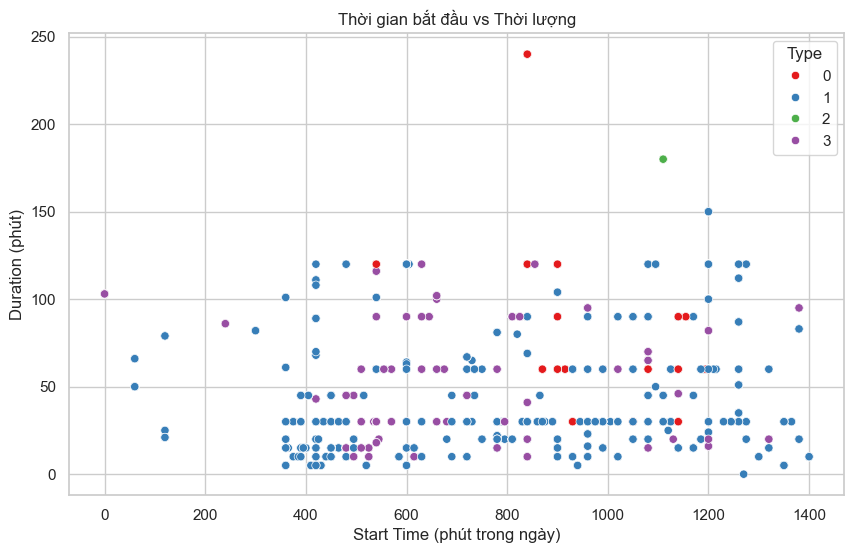

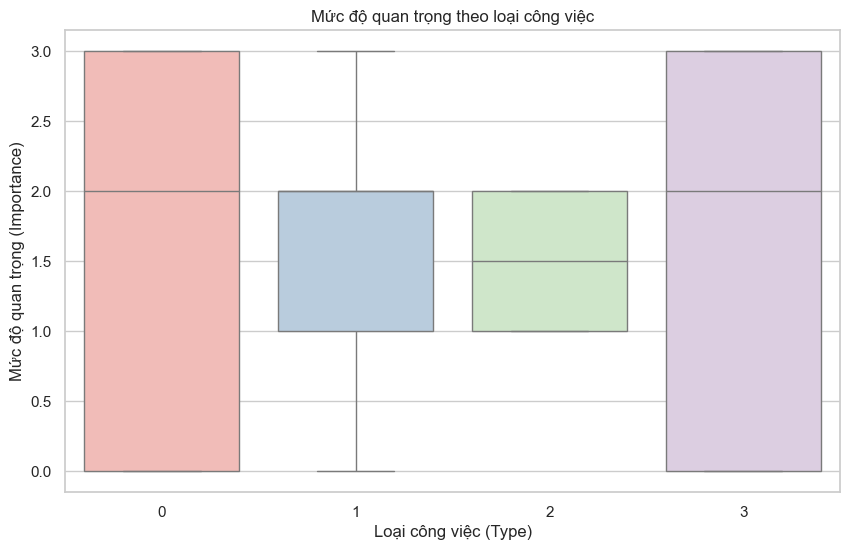

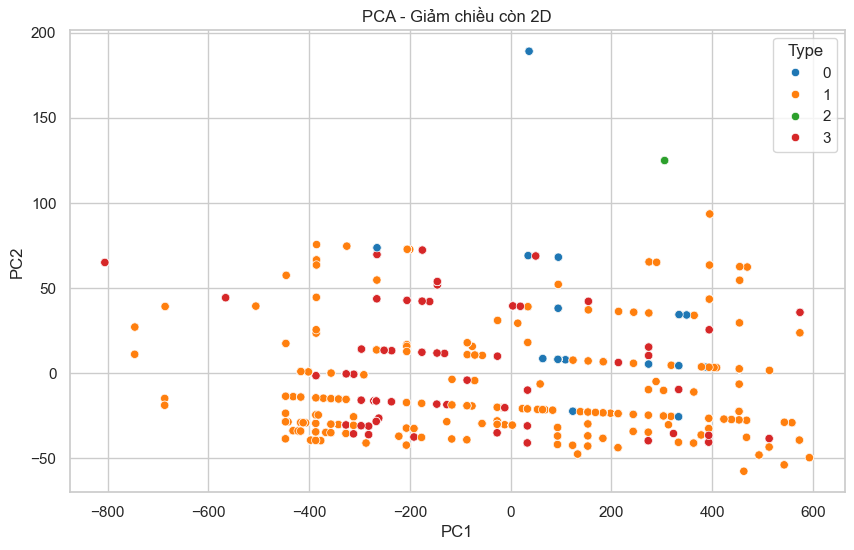

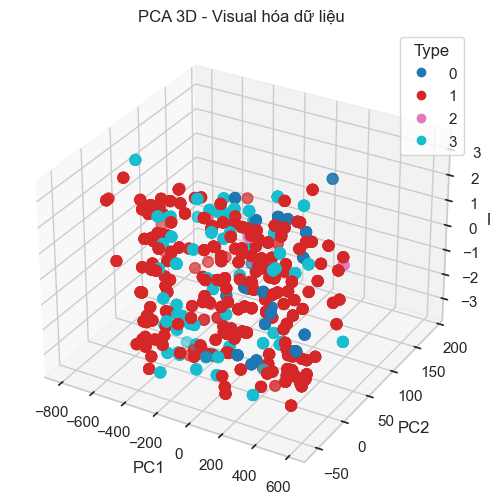

In [6]:
# 1. Heatmap biểu thị tương quan giữa các cột số
plt.figure()
correlation = used_data[["Duration", "Importance", "DayOfWeek", "StartTimeMinutes", "Type"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

# 2. Scatter plot giữa Duration và StartTimeMinutes
plt.figure()
sns.scatterplot(data=used_data, x="StartTimeMinutes", y="Duration", hue="Type", palette="Set1")
plt.title("Thời gian bắt đầu vs Thời lượng")
plt.xlabel("Start Time (phút trong ngày)")
plt.ylabel("Duration (phút)")
plt.show()

# 3. Boxplot: Importance theo Type
plt.figure()
sns.boxplot(data=used_data, x="Type", y="Importance", hue="Type", palette="Pastel1", legend=False)
plt.title("Mức độ quan trọng theo loại công việc")
plt.xlabel("Loại công việc (Type)")
plt.ylabel("Mức độ quan trọng (Importance)")
plt.show()


# Áp dụng PCA lên các cột số (hoặc dữ liệu vector hóa)
numerical_features = used_data[["Duration", "Importance", "DayOfWeek", "StartTimeMinutes", "Type"]]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_features)

# Biểu đồ scatter plot 2D sau PCA
plt.figure()
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=used_data["Type"], palette="tab10")
plt.title("PCA - Giảm chiều còn 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# PCA 3D
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(numerical_features)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2],
    c=used_data["Type"], cmap="tab10", s=60
)
ax.set_title("PCA 3D - Visual hóa dữ liệu")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Type")
plt.show()

In [7]:
# Huấn luyện và lưu mô hình
# TRAIN TYPE PREDICTION MODEL
# train_type_prediction_model(task_name_vectorized, used_data_type=used_data['Type'], used_data_userid=used_data['UserID'])
train_type_prediction_model(task_name_vectorized, used_data_type=used_data['Type'])

# TRAIN IMPORTANCE PREDICTION MODEL
# train_importance_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
#                                   used_data_importance=used_data['Importance'], used_data_userid=used_data['UserID'])
train_importance_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
                                  used_data_importance=used_data['Importance'])

# TRAIN DURATION PREDICTION MODEL
# train_duration_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
#                                 used_data_day_of_week=used_data['DayOfWeek'],
#                                 used_data_importance=used_data['Importance'], used_data_userid=used_data['UserID'], used_data_duration=used_data['Duration'])
train_duration_prediction_model(task_name_vectorized, used_data_type=used_data['Type'],
                                used_data_day_of_week=used_data['DayOfWeek'],
                                used_data_importance=used_data['Importance'], used_data_duration=used_data['Duration'])

#-------------------------
# def time_to_minutes(start_time):
#     hours, minutes = map(int, start_time.split(":"))
#     return hours * 60 + minutes
#
# used_data['StartTimeMinutes'] = used_data['StartTime'].apply(time_to_minutes)

# required_columns = used_data[['Type', 'Importance', 'DayOfWeek', 'UserID']]
required_columns = used_data[['Type', 'Importance', 'DayOfWeek']]

train_start_time_prediction_model_2(task_name_vectorized, required_columns=required_columns,
                                  start_time_minutes=used_data['StartTimeMinutes'])

-----type_prediction_model START TRAINNING.-----
Accuracy: 0.956989247311828
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97       262
           2       1.00      1.00      1.00         2
           3       0.98      0.81      0.89        80

    accuracy                           0.96       372
   macro avg       0.98      0.95      0.97       372
weighted avg       0.96      0.96      0.96       372

type_prediction_model.pkl have been saved successfully.
-----importance_prediction_model START TRAINNING.-----
Accuracy: 0.8951612903225806
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        47
           1       0.88      0.83      0.86        71
           2       0.91      0.96      0.94       205
           3       0.94      0.69      0.80        49

    accuracy                           0.90       372
   macro avg       0.8